# Lab | Intro to Probability

**Objective**

Welcome to this Intro to Probability lab, where we explore decision-making scenarios through the lens of probability and strategic analysis. In the business world, making informed decisions is crucial, especially when faced with uncertainties. This lab focuses on scenarios where probabilistic outcomes play a significant role in shaping strategies and outcomes. Students will engage in exercises that require assessing and choosing optimal paths based on data-driven insights. The goal is to enhance your skills by applying probability concepts to solve real-world problems.

**Challenge 1**

#### Ironhack Airlines 

Often Airlines sell more tickets than they have seats available, this is called overbooking. Consider the following:
- A plane has 450 seats. 
- Based on historical data we conclude that each individual passenger has a 3% chance of missing it's flight. 

If the Ironhack Airlines routinely sells 460 tickets, what is the chance that they have a seats for all passenger?

In [1]:
from scipy.stats import binom

disponibles = 450
p = 0.03
vendidos = 460
probabilidad_coger_vuelo = 1 - p

prob = binom.cdf(disponibles,vendidos,probabilidad_coger_vuelo)
print(f"La probabilidad de que el vuelo salga con {disponibles} asientos disponibles es {prob*100:.2f}%")


La probabilidad de que el vuelo salga con 450 asientos disponibles es 88.45%


**Challenge 2**

#### Ironhack Call Center 

Suppose a customer service representative at a call center is handling customer complaints. Consider the following:
- The probability of successfully resolving a customer complaint on the first attempt is 0.3. 


What is the probability that the representative needs to make at least three attempts before successfully resolving a customer complaint?

In [2]:
from scipy.stats import geom
p = 0.3
k = 3
probabilidad = 1-geom.cdf(k-1,p)
print(f'La probabilidad de que el cliente necesite al menos 3 intentos antes de ser resuelta exitosamente su queja es: {probabilidad:.2f}% ')


La probabilidad de que el cliente necesite al menos 3 intentos antes de ser resuelta exitosamente su queja es: 0.49% 


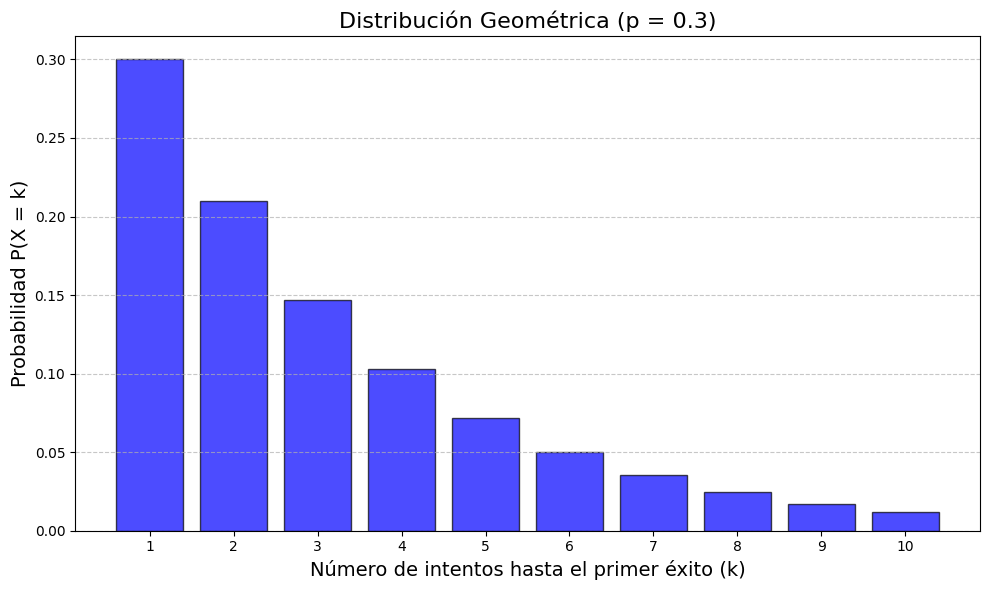

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Valores de k (número de intentos hasta el primer éxito)
ks = np.arange(1, 11)

# Calcular la PMF para cada valor de k
ps = geom.pmf(ks, p)

#Crea el gráfico

plt.figure(figsize=(10, 6))
plt.bar(ks, ps, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribución Geométrica (p = 0.3)', fontsize=16)
plt.xlabel('Número de intentos hasta el primer éxito (k)', fontsize=14)
plt.ylabel('Probabilidad P(X = k)', fontsize=14)
plt.xticks(ks)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



**Challenge 3**

#### Ironhack Website

Consider a scenario related to Ironhack website traffic. Where:
- our website takes on average 500 visits per hour.
- the website's server is designed to handle up to 550 vists per hour.


What is the probability of the website server being overwhelmed?

In [4]:
from scipy.stats import poisson
visitas_lambda = 500
limite_server = 550

probabilidad_caida= 1 - poisson.cdf(limite_server,visitas_lambda)

print(f'La probabilidad de que el server se caiga es: {probabilidad_caida*100:.2f}%')



La probabilidad de que el server se caiga es: 1.29%


What is the probability of being overwhelmed at some point during a day? (consider 24hours)

In [5]:
p_caida_dia = 1 - poisson.cdf(limite_server,visitas_lambda)**24
print(f'La probabilidad de caída durante las 24 horas de un días es: {p_caida_dia:.2f}%')

La probabilidad de caída durante las 24 horas de un días es: 0.27%


**Challenge 4**

#### Ironhack Helpdesk

Consider a scenario related to the time between arrivals of customers at a service desk.

On average, a customers arrives every 10minutes.

What is the probability that the next customer will arrive within the next 5 minutes?

La probabilidad de que al menos un cliente llegue en 5 minutos es : 0.39%


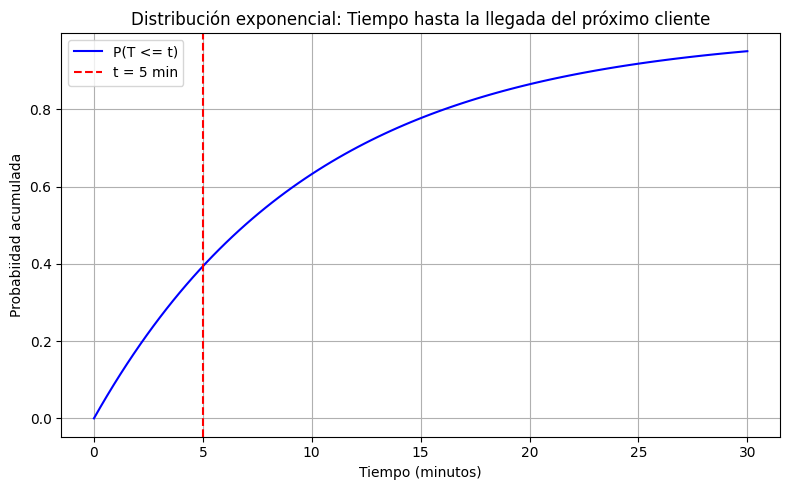

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
lambda_clientes = 10 # tiempo medio entre llegadas = 10 minutos
lambda_rate = 1/lambda_clientes # tasa de llegada por minuto

probabilidad_llegada = 1  - np.exp((-1/lambda_clientes)*5)
print(f'La probabilidad de que al menos un cliente llegue en 5 minutos es : {probabilidad_llegada:.2f}%')


#Tiempo en minutos
t = np.linspace(0,30,100)

# Función de distribución acumulada (CDF) de la exponencial: P(T <= t)
cdf = 1 - np.exp(-lambda_rate*t)

# Gráfico
plt.figure(figsize=(8,5))
plt.plot(t,cdf,label='P(T <= t)', color='blue')
plt.axvline(5,color='red', linestyle='--',label='t = 5 min')
plt.title('Distribución exponencial: Tiempo hasta la llegada del próximo cliente')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Probabiidad acumulada')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

If there is no customer for 15minutes, employees can that a 5minutes break.

What is the probability an employee taking a break?

In [12]:
# Probabilidad de que NO llegue ningún cliente en 15 minutos
t2 = 15
probabilidad_descanso = np.exp(-lambda_rate * t2)
print(f'La probabilidad de que ningún cliente llegue en {t2} minutos es: {probabilidad_descanso * 100:.2f}%')

La probabilidad de que ningún cliente llegue en 15 minutos es: 22.31%


**Challenge 5**

The weights of a certain species of birds follow a normal distribution with a mean weight of 150 grams and a standard deviation of 10 grams. 

- If we randomly select a bird, what is the probability that its weight is between 140 and 160 grams?

In [8]:
from scipy.stats import norm
media = 150
sigma = 10

probabilidad = norm.cdf(160,media,sigma)-norm.cdf(140,media,sigma)
print(f'La probabilidad de que el ave pese entre 140 y 160 gramos es: {probabilidad*100:.2f}%')


La probabilidad de que el ave pese entre 140 y 160 gramos es: 68.27%


**Challenge 6**

If the lifetime (in hours) of a certain electronic component follows an exponential distribution with a mean lifetime of 50 hours, what is the probability that the component fails within the first 30 hours?

In [9]:
lambda_componente = 1/50
probabilidad = 1 - np.exp(-lambda_componente*30)

print(f'La probabilidad de que al menos un componente flle en 30 horas es {probabilidad*100:.2f}%')



La probabilidad de que al menos un componente flle en 30 horas es 45.12%


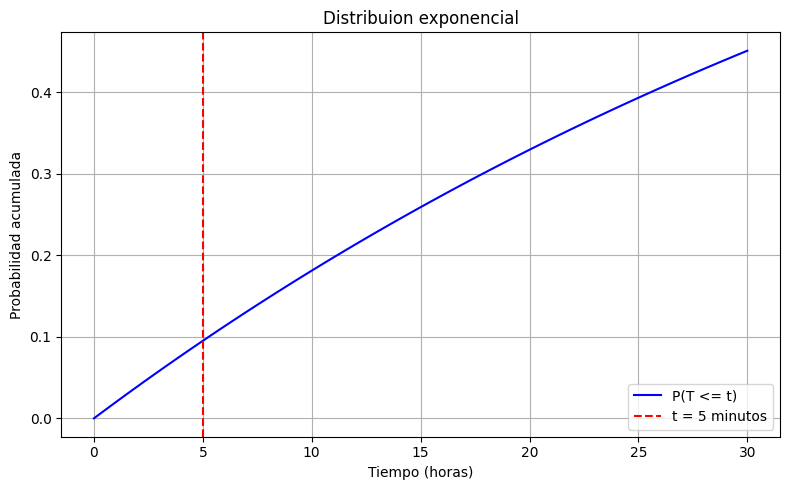

In [11]:
t = np.linspace(0,30,100) # De 0 a 30 minutos

#Función de distribución acumulada (CDF) de la exponencial:  P(T <= t)
cdf = 1 - np.exp(-lambda_componente * t)

plt.figure(figsize=(8,5))
plt.plot(t,cdf,label='P(T <= t)',color='blue')
plt.axvline(5,color='red',linestyle='--',label='t = 5 minutos')
plt.title('Distribuion exponencial')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Probabilidad acumulada')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()